# [LDSSA Hackathon] - Song Genre Prediction (NLP Specialization)

This notebook aims to predict music genre using NLP Features.

* Author: Jessica Rodrigues
* Date: 04-03-2024

In [1]:
from pathlib import Path

In [2]:
# project directory
project_dir = Path(".").resolve().parent

## 1. Data

In this section, we are going to perform the Exploratory Data Analysis and the pre-processing of training, and test sets.

In [3]:
import pandas as pd
from src.data.read_dataset import get_data
pd.set_option('display.max_colwidth', None)

### 1.1 Lyrics Dataset

The autonlp-data-song-lyrics dataset (https://huggingface.co/datasets/juliensimon/autonlp-data-song-lyrics) contains ∼53, 882 entries.

The dataset is a csv file and the columns are: **Lyric**, and **Genre0**. The file must be inside the **./data/raw/** directory and the extension must be .csv:
* **Genre0**: multiclass variable, indicating six different song genres: Dance, Heavy Metal, Hip Hop, Indie, Pop, Rock.

In [4]:
TRAIN_FILE = project_dir / "data" / "raw" / "train2.csv"
TEST_FILE = project_dir / "data" / "raw" / "raw_val2.csv"

In [5]:
df_train = pd.read_csv(TRAIN_FILE, delimiter=",", header=0, encoding='utf-8', engine='python')
df_test = pd.read_csv(TEST_FILE, delimiter=",", header=0, encoding='utf-8', engine='python')

In [6]:
df_train.head(3)

,Lyric,Genre0
0,[Intro: Method Man w/ sample] + (Sunny valentine). We got butter (8X). (The gun'll go the gun'll go.... The gun'll go...). [Raekwon]. Aiyo one thing for sure keep you of all. Keep a nice crib fly away keep to the point. Keep niggaz outta ya face who snakes. Keep bitches in they place keep the mac in a special place. Keep moving for papes keep cool keep doing what you doing. Keep it fly keep me in the crates. Cuz I will erase shit on the real note you'se a waste. It's right here for you I will lace you. Rip you and brace you put a nice W up on ya face. Word to mother you could get chased. It's nothing to taste blood on a thug if he gotta go. All I know is we be giving grace. This is a place from where we make tapes. We make 'em everywhere still in all we be making base. Y'all be making paste these little niggaz they be making shapes. Our shit is art yours is traced. [Chorus: Sunny Valentine]. This is the way that we rolling in the streets. You know when we roll we be packing that heat. The gun'll go the gun'll go the gun'll go the gun'll go. The gun'll go the gun'll go the gun'll go the gun'll go. The gun'll go the gun'll go.... [Method Man]. This is Poverty Island man these animals don't run. Slums where the ambulance don't come. Who got the best base? Fiends waiting to smoke some. Approach something ask him where he getting that coke from. My dudes hug blocks like samurai shogun. Cuz no V and no ones equalling no fun. Who want a treat they know huh? Body to go numb. My woman need funds plus her hair and her toes done. It is what it is though you fuck with the kid flow. That make it hard to get dough the harder to get gold. Harder the piff blow harder when it snow. The pinky and the wrist glow this here what we live for. Get gwop then get low but first thought. We gotta get the work off the gift and the curse boss. Yeah see I'm the shit yo the dirt in the fit no. Hustling from the get-go the motto is get more. [Chorus]. [Masta Killa]. We was quiet flashy brothers strapped all along. With the dirty .38 long twelve hour shift gate. Took case state to state you think he won't hold his weight?. Put ya money on the plate and watch it get scrapped. We get ape up in that club off that juice and Henn. And it's a no win situation fucking with them. You mean like Ewing at the front at the rim finger roll a Dutch. Million dollar stages touched techs gauges bust. Trust no one the lone shogun rugged Timb boot stomper. Damaging lyrical mass destruction launcher. Nothing can calm the quakeage when I break kid. Peace to my brothers up north doing state bids. [Chorus]. [Chorus 2: Sunny Valentine]. Whoa... this is the way we be rolling in the club. You know when we roll we be packing .32 snubs. The gun'll go the gun'll go the gun'll go the gun'll go. The gun'll go the gun'll go the gun'll go the gun'll go. The gun'll go the gun'll go the gun'll go the gun'll go. [Outro: sample to fade]. We got butter...,Hip Hop
1,"[Sean Paul:]. Aye. It's Sean Paul 'long side. The mandem called Jay Sean. Fi di gal dem. Tellin' 'em again what we tell 'em. [Jay Sean:]. Pass me a drink to the left yeah. Said her name was Delilah. And I'm like ""you should come my way"". I already surrender. Damn girl that body's fire. You gon' remember my name. (She should give it up definite). You need it. I need it. We can jump in the deep end. I wanna get lost in your love. I just wanna be close to you. (Just wanna I just wanna). And do all the things you want me to. I just wanna be close to you. (I just wanna I just wanna). And show you the way I feel. You make my love go. You make my love go. You make my love go. In the morning we gon' do it again wake up. I'mma do it like we just broke up and made up. Get up on top of me and work up a sweat work up a sweat. See we can do it any type of way that you want. I'm thinking maybe you're the right kind of wrong. I'm saying baby you won't ever forget my love. You need it. I need it. We can jump in the deep end. I wanna

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48493 entries, 0 to 48492
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Lyric   48493 non-null  object
 1   Genre0  48493 non-null  object
dtypes: object(2)
memory usage: 757.8+ KB


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5389 entries, 0 to 5388
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Lyric   5389 non-null   object
 1   Genre0  5389 non-null   object
dtypes: object(2)
memory usage: 84.3+ KB


In [10]:
df_train.describe()

,Lyric,Genre0
count,48493,48493
unique,48274,6
top,[This song is an instrumental.].,Rock
freq,13,18993


In [11]:
df_test.describe()

,Lyric,Genre0
count,5389,5389
unique,5388,6
top,Welcome to where time stands still. No one leaves and no one will. Moon is full never seems to change. Just labeled mentally deranged. Dream the same thing every night. I see our freedom in my sight. No locked doors no windows barred. No things to make my brain seem scarred. Sleep my friend and you will see. That dream is my reality. They keep me locked up in this cage. Can't they see it's why my brain says rage. Sanitarium leave me be. Sanitarium just leave me alone. Build my fear of what's out there. And cannot breathe the open air. Whisper things into my brain. Assuring me that I'm insane. They think our heads are in their hands. But violent use brings violent plans. Keep him tied it makes him well. He's getting better can't you tell?. No more can they keep us in. Listen damn it we will win. They see it right they see it well. But they think this saves us from our hell. Sanitarium leave me be. Sanitarium just leave me alone. Sanitarium just leave me alone. Fear of living on. Natives getting restless now. Mutiny in the air. Got some death to do. Mirror stares back hard. Kill it's such a friendly word. Seems the only way. For reaching out again,Rock
freq,2,2110


In [12]:
# Reducing to majority classes
df_train = df_train[(df_train.Genre0 == 'Rock') | (df_train.Genre0 == 'Pop') | (df_train.Genre0 == 'Hip Hop')]
df_test = df_test[(df_test.Genre0 == 'Rock') | (df_test.Genre0 == 'Pop') | (df_test.Genre0 == 'Hip Hop')]

### 1.2 Exploratory Data Analysis

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from src.data.read_dataset import get_data
from src.data.make_dataset import create_train_test_sets

In [14]:
# Rename key columns
df_train.rename(columns={'Genre0': 'label', 'Lyric': 'text'}, inplace=True)
df_test.rename(columns={'Genre0': 'label', 'Lyric': 'text'}, inplace=True)

In [15]:
# Checking the missing data
df_train.isnull().sum().sort_values(ascending=False)

text     0
label    0
dtype: int64

In [16]:
# Checking the duplicate data
df_train.duplicated().sum()

121

In [17]:
# Removing duplicates
df_train = df_train.drop_duplicates()

In [18]:
df_train["label"].value_counts()

label
Rock       18954
Pop        11118
Hip Hop     8860
Name: count, dtype: int64

In [19]:
df_test["label"].value_counts()

label
Rock       2110
Pop        1244
Hip Hop     964
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

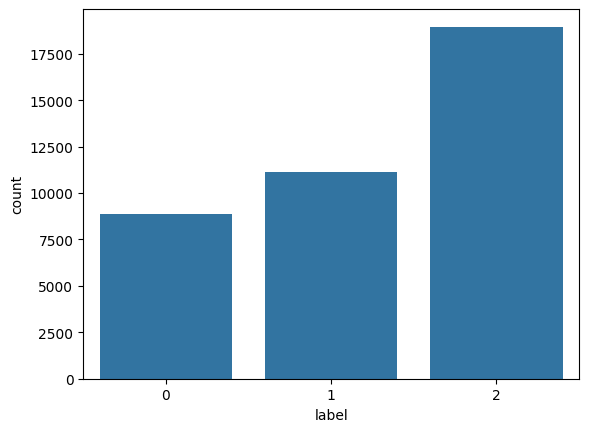

In [56]:
sns.countplot(x = df_train['label'])

<Axes: xlabel='label', ylabel='count'>

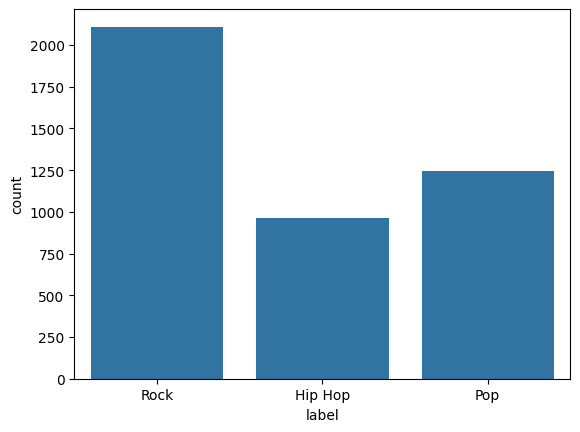

In [21]:
sns.countplot(x = df_test['label'])

In [22]:
# Changing to numeric type
label = LabelEncoder()
df_train['label'] = label.fit_transform(df_train['label'])
df_test['label'] = label.fit_transform(df_test['label'])

In [23]:
# Create training and test sets with the same class distribution
# param data: Dataframe 
# param train_frac: Ratio of train set to whole dataset
# param balanced: Downsample majority class equal to the number of samples in the minority class
#create_train_test_sets(df_train, 0.8, False)

In [24]:
# save pre-processed files
#TRAIN_PATH = project_dir / "data" / "processed" / "train.csv"
#df_train.to_csv(TRAIN_PATH, index=False)
TEST_PATH = project_dir / "data" / "processed" / "test.csv"
df_test.to_csv(TEST_PATH, index=False)

## 2. Training

In this section, we are going to adopt a  Logistic Regression classifier as a baseline and a pre-trained language model as our model. We are going to fine-tune our model on the Lyrics dataset (train and dev splits).

[BONUS!]
We used the [Transformers library](https://huggingface.co/docs/transformers/index) provided by the Hugging Face with the following pre-trained model:

* **distilbert-base-uncased**: DistilBERT is a transformers model, smaller and faster than BERT, which is pretrained also in a self-supervised fashion, using the BERT base model as a teacher.

The model is pre-trained on English texts.

As an alternative, you can download my trained model [here](https://drive.google.com/drive/folders/1NBi2vfn71PxZ5gNx2DoRkpzSmhGPUOkX?usp=sharing) and save in `./model/`.

In [25]:
from src.models.train_model import TransformerFineTuning
from src.models.baseline import BaselinePredict
from src.models.predict_model import TransformerPredict

In [30]:
# Models
MY_MODEL = "distilbert-base-uncased"
BASELINE_MODEL = "LogisticRegression"

### [BONUS!] 2.1 DistilBERT

In [28]:
# Fine-tune my model
TransformerFineTuning(MY_MODEL).train()

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/31145 [00:00<?, ? examples/s]

Map:   0%|          | 0/7787 [00:00<?, ? examples/s]

/Users/jrt0234/PycharmProjects/song-genre-prediction-original/venv/lib/python3.12/site-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.580800,0.548667,0.766149,0.763578,0.766149,0.756817
2,0.462100,0.530087,0.775395,0.772711,0.775395,0.769309
3,0.344400,0.600873,0.777578,0.773796,0.777578,0.772643
4,0.245100,0.668602,0.768846,0.771207,0.768846,0.769559


## 3. Prediction

In this section, we are going to predict the probabilities of label 0 (**Hip Hop**), label 1 (**Pop**), label 2 (**Rock**) for the test cases.

In [49]:
COMPARE_MY_MODEL = True
COMPARE_BASELINE_MODEL = True

In [50]:
# Do I have my baseline model available?
if COMPARE_BASELINE_MODEL and BASELINE_MODEL not in df_test:

    model = BaselinePredict(BASELINE_MODEL)
    df_test[BASELINE_MODEL] = df_test.text.apply(lambda row: model.predict(row)[0])

In [43]:
# Do I have my distilbert model available?
if COMPARE_MY_MODEL and MY_MODEL not in df_test:
    
    MODEL_PATH = project_dir / "model" / MY_MODEL
    
    if not MODEL_PATH.exists():
        raise FileNotFoundError("Failed to load the model")

    model = TransformerPredict(MODEL_PATH)
    
    df_test[MY_MODEL] = df_test.text.apply(lambda row: model.predict(str(row))[0]["label"])
    df_test[MY_MODEL] = df_test[MY_MODEL].apply(lambda row: int(row.split('_')[1]))

/Users/jrt0234/PycharmProjects/song-genre-prediction-original/venv/lib/python3.12/site-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [51]:
df_test

,text,label,distilbert-base-uncased,LogisticRegression
0,"I was nineteen when I came to town they called it the Summer of Love. They were burning babies burning flags. The hawks against the doves. I took a job in the steamie down on Cauldrum Street. And I fell in love with a laundry girl who was working next to me. Oh she was a rare thing fine as a bee's wing. So fine a breath of wind might blow her away. She was a lost child oh she was running wild. She said ""As long as there's no price on love I'll stay.. And you wouldn't want me any other way"". Brown hair zig-zag around her face and a look of half-surprise. Like a fox caught in the headlights there was animal in her eyes. She said ""Young man oh can't you see I'm not the factory kind. If you don't take me out of here I'll surely lose my mind"". Oh she was a rare thing fine as a bee's wing. So fine that I might crush her where she lay. She was a lost child she was running wild. She said ""As long as there's no price on love I'll stay.. And you wouldn't want me any other way"". We busked around the market towns and picked fruit down in Kent. And we could tinker lamps and pots and knives wherever we went. And I said that we might settle down get a few acres dug. Fire burning in the hearth and babies on the rug. She said ""Oh man you foolish man it surely sounds like hell.. You might be lord of half the world you'll not own me as well"". Oh she was a rare thing fine as a bee's wing. So fine a breath of wind might blow her away. She was a lost child oh she was running wild. She said ""As long as there's no price on love I'll stay.. And you wouldn't want me any other way"". We was camping down the Gower one time the work was pretty good. She thought we shouldn't wait for the frost and I thought maybe we should. We was drinking more in those days and tempers reached a pitch. And like a fool I let her run with the rambling itch. Oh the last I heard she's sleeping rough back on the Derby beat. White Horse in her hip pocket and a wolfhound at her feet. And they say she even married once a man named Romany Brown. But even a gypsy caravan was too much settling down. And they say her flower is faded now hard weather and hard booze. But maybe that's just the price you pay for the chains you refuse. Oh she was a rare thing fine as a bee's wing. And I miss her more than ever words could say. If I could just taste all of her wildness now. If I could hold her in my arms today. Well I wouldn't want her any other way",2,2,2
1,Your coat and hat are gone. I've really can't look at your little empty shelf. A ragged teddy bear. It feels like we never had a chance. Don't look me in the eye. We lay in each others arms. But the room is just an empty space. I guess we've lived it out. Something in the air. We smiled to fast then can't think of a thing to say. Lived with the best times. Left with the worst. I've danced with you too long. Nothing left to save. Let's take what we can. I know you hold your head up high. We've raced for the last time. A place of no return. And there's is something in the air. Something in my eye. I've dance with you too long (yeah). Something in the air. Something in my eye. Abracadoo I loose you. We can't avoid the clash. The big mistake. Now we're gonna pay and pay. The sentence of our lives. Can't believe I'm asking you to go. We used what we could. To get the things we want. But we lost each other on the way. I guess you know I never wanted anyone more than you. Lived all our best times. Left with the worst. I've danced with you to long. Say what you will. There's something in the air. Raced for the last time. Well I know you'll hold your head up high. But it's nothing we have to say. There's nothing in our eyes. But there's something in the air. Something in my eye. I've danced with you too long. There's something I have to say. There's something in the air. Something in my eye. Do do do do. Do do do do. I've danced with you too long. Do do do do. Do do do do. Dance

## 4. Evaluation

In this section, we are going to use different evaluation metrics to report the performance in the test set. The following metrics will be used: 

* **Classification metrics** (precision, recall, f-score).

In [52]:
import numpy as np
from sklearn.metrics import roc_curve, auc

### 4.1. Multiclass Classification

In this section, we want to measure the performance of a classification setup. In this way, we want to predict the label in the test set by using the probability score provided by the model.

#### 4.1.1. Classification Report

For each one of the classification classes, we can mesure the following classification metrics:

* **precision** - TP / (TP + FP) - the number of correcly classified in this class divided by the total number of elements labelled as belonging to the given class [[ref](https://en.wikipedia.org/wiki/Precision_and_recall#Definition_(classification_context))];
* **recall** - TP / (TP + FN) - the number of correcly classified in this class divided by the total number of elements that actually belong to this class [[ref](https://en.wikipedia.org/wiki/Precision_and_recall#Definition_(classification_context))];
* **f1** - 2*(precion+recall)/(precision+recall) - weighted average of the precision and recall.

In addition, for each classifier, disregarding the class, we can measure the overall accuracy:

* **accuracy** - the number of correctly classified over the number of all sentences, i.e, (TP+TN) / (TP+TN+FP+FN)

In [53]:
from sklearn.metrics import classification_report

In [54]:
y_true = df_test["label"]

In [57]:
# performance baseline
y_pred = df_test[BASELINE_MODEL]
print(classification_report(y_true, y_pred, target_names=["Hip Hop", "Pop", "Rock"]))

              precision    recall  f1-score   support

     Hip Hop       0.89      0.80      0.85       964
         Pop       0.60      0.43      0.50      1244
        Rock       0.72      0.86      0.78      2110

    accuracy                           0.73      4318
   macro avg       0.74      0.70      0.71      4318
weighted avg       0.72      0.73      0.72      4318



In [58]:
# performance model distilbert
y_pred = df_test[MY_MODEL]
print(classification_report(y_true, y_pred, target_names=["Hip Hop", "Pop", "Rock"]))

              precision    recall  f1-score   support

     Hip Hop       0.91      0.86      0.88       964
         Pop       0.66      0.63      0.64      1244
        Rock       0.80      0.85      0.82      2110

    accuracy                           0.79      4318
   macro avg       0.79      0.78      0.78      4318
weighted avg       0.79      0.79      0.79      4318

